# Analysing Data on Credit Card Customers to Develop Machine Learning Models Using Python

## Importing libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

## Importing Data

In [ ]:
data = pd.read_csv("/content/CC_Default.csv")

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.rename(columns = {"PAY_0": "PAY_1",}, inplace = True)

In [ ]:
data.shape

(30000, 25)

There are total of 30,000 observations and 25 varibles in the above dataset of the customer's credit card information.

## Descriptive Analysis

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
#checking the missing values
data.isna().sum().sum()

np.int64(0)

In [9]:
def edu_clean(data):
    data.loc[(data['EDUCATION'] == 0) | (data['EDUCATION'] == 6), 'EDUCATION'] = 5

In [ ]:
edu_clean(data)

There are no missing values in the dataset, as per the output of the above cell

In [ ]:
# univariate analysis using histplot
def univariate_histplot(dataset):
    f, axs = plt.subplots(5,5, figsize = (30,25))
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.5)
    col_list = [x for x in dataset if x != 'ID']
    for i, col in enumerate(col_list):
        row_index = i // 5
        col_index = i % 5
        if i < 25:
            sns.histplot(data=data, x=col, ax = axs[row_index][col_index])
    plt.show()

In [ ]:
data.describe(include = "all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853767,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.784391,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,5.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


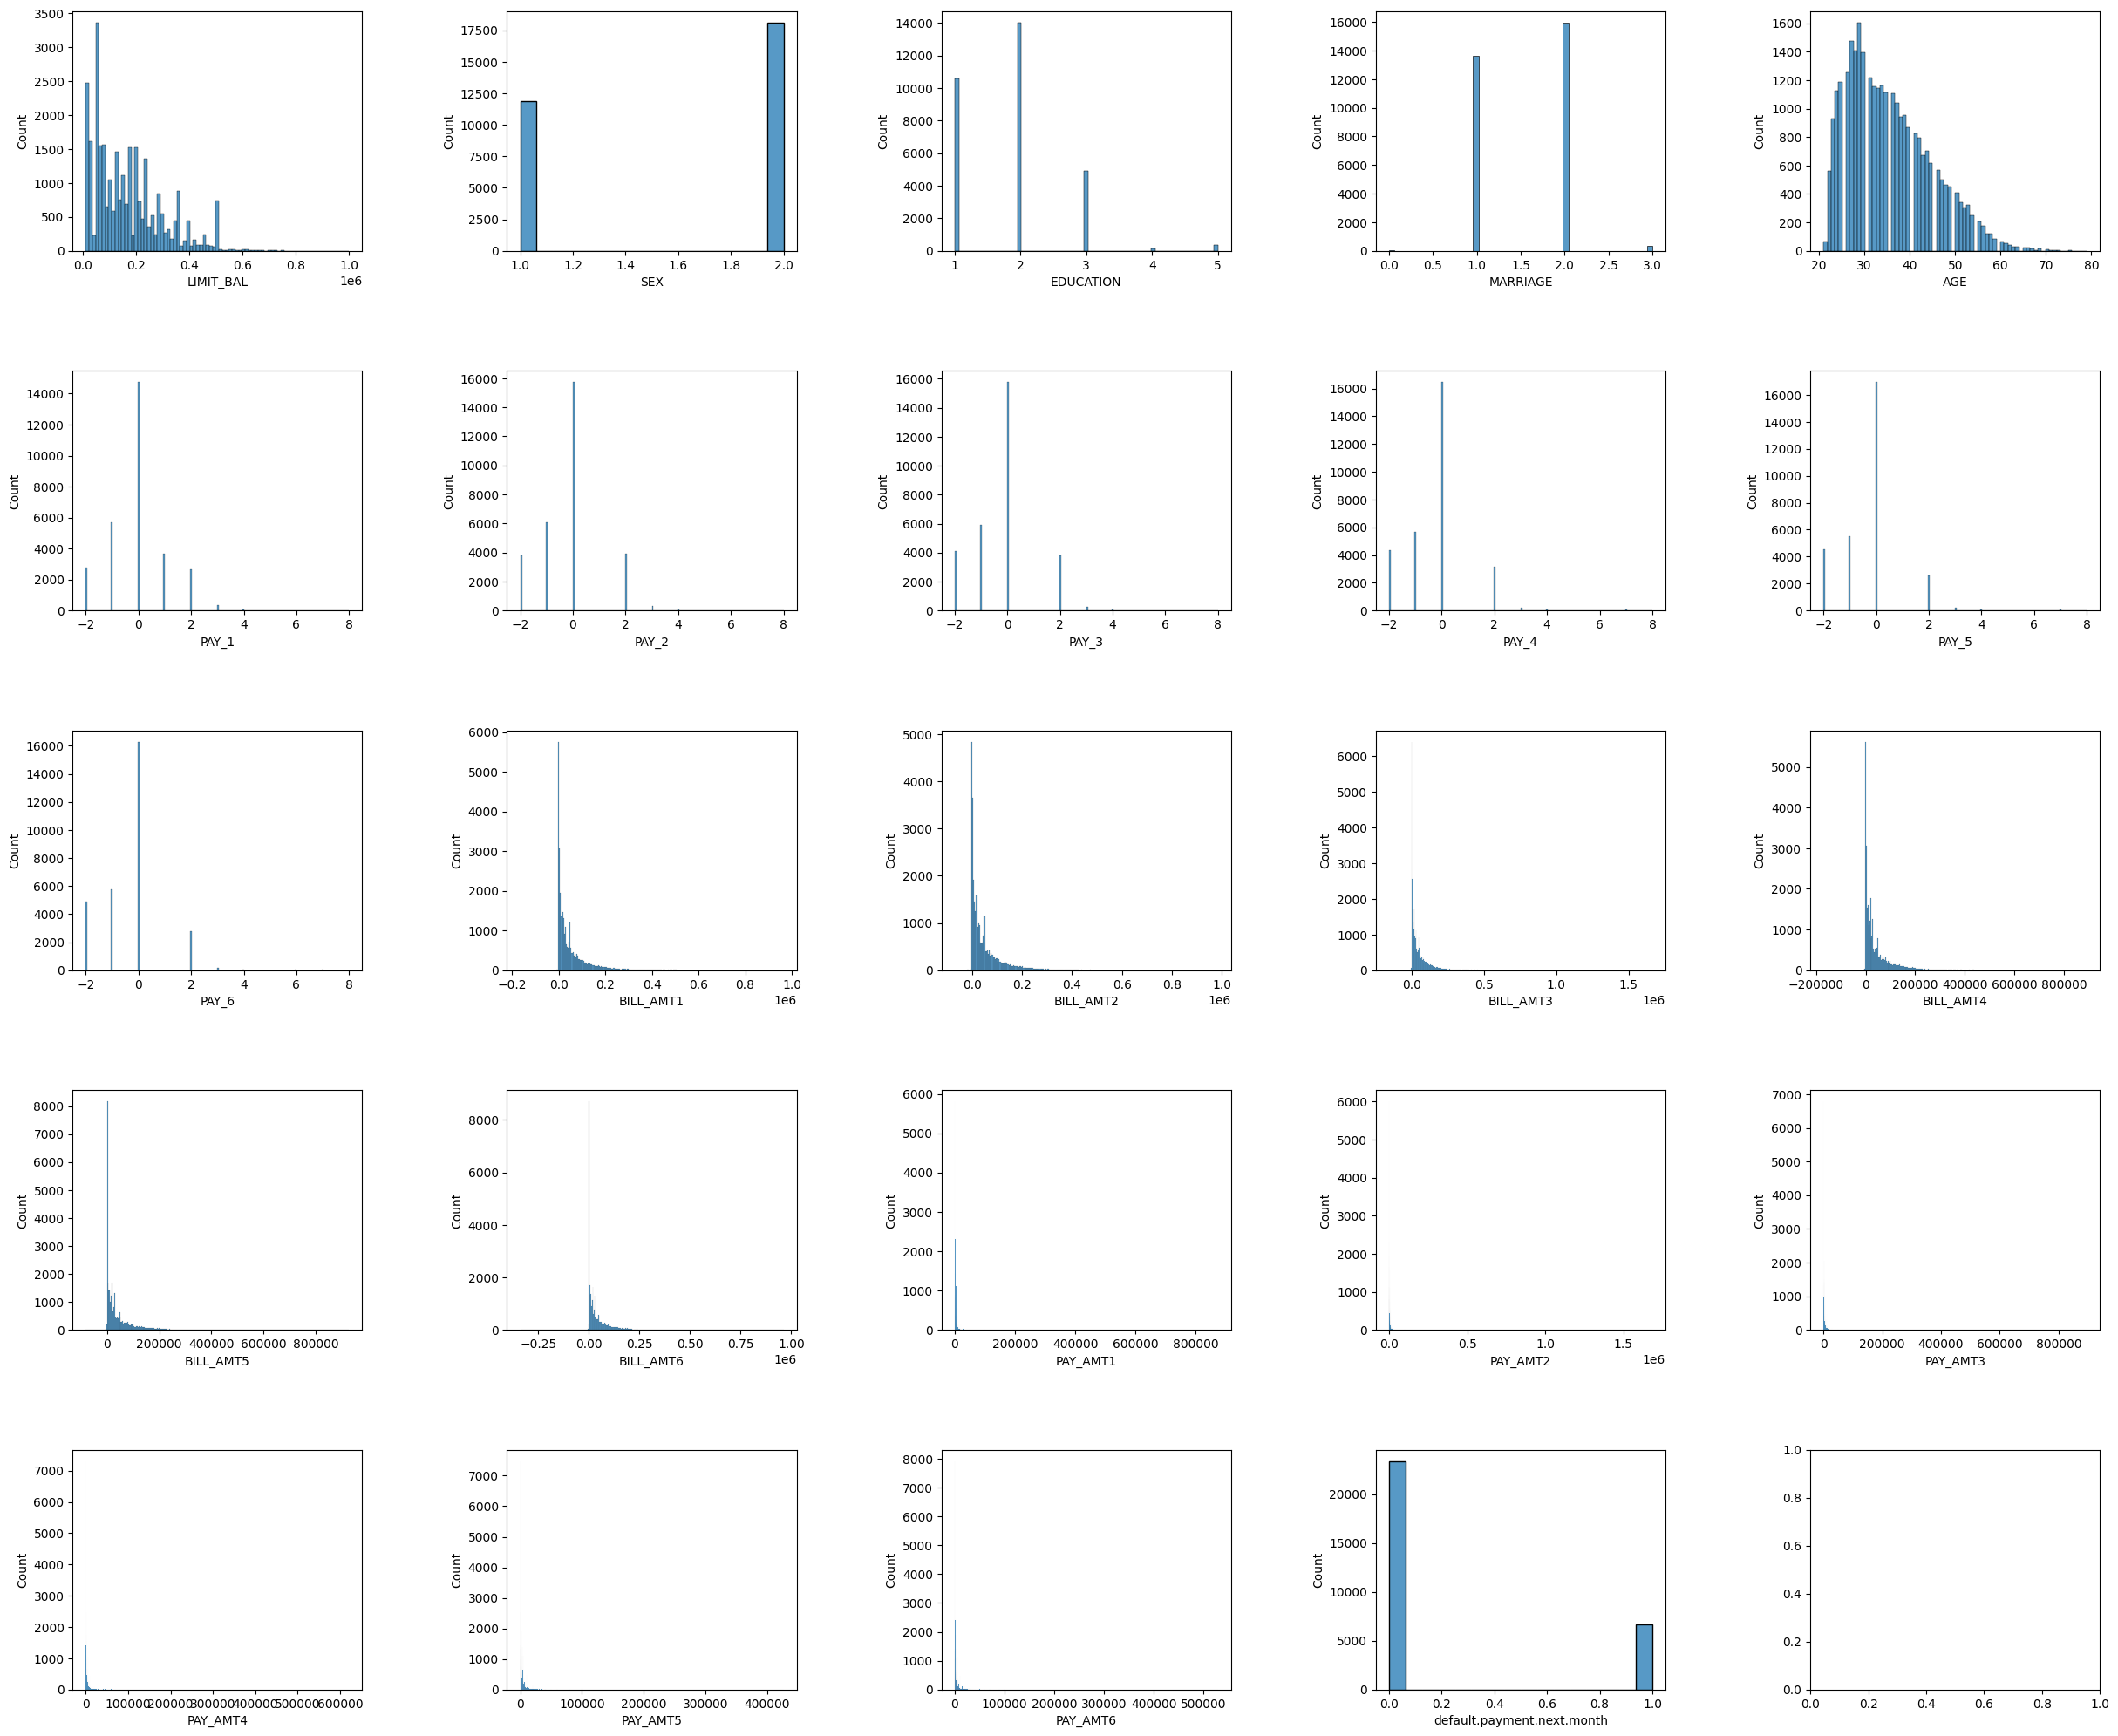

In [ ]:
univariate_histplot(data)

#### Key insights
* Columns like LIMIT_BAL(peaks at lower credit values, multiple small peaks, frequency decreases with increase in remaining limit), AGE(peak is around 30s, frequency is decreasing as age increases) are right skewed, having most of the data points to the left side and having some extreme values that resulted in the mean>median>mode.
  
* Column like sex is binary having 0 or 1 as output.

* Columns like education(most frequent are university level educated) and marriage(most frequent are singles followed by married) are categorical having multiple possible values.

* Columns like PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 seem to be categorical.Most data points are at 0, means paid duly.

* Columns like BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6(All having bill amounts mainly focused in 0 to 1,00,000-1,50,000, frequency decreases as bill amount increases) are right skewed meaning the mean>median>mode, meaning there are some extreme values in the data that are making the right skew, whereas majority of the data points having smaller values lies towards the left.

* Columns like PAY_AMOUNT1, PAY_AMOUNT2, PAY_AMOUNT3, PAY_AMOUNT4, PAY_AMOUNT5, PAY_AMOUNT6 also right skewed, meaning most of the data points on the lower side. The payments made having less frequency when compared to bill_amounts, signifing partial payments as the general trend.

* Column default.payment.next.month is a binary column having 0 or 1 output.

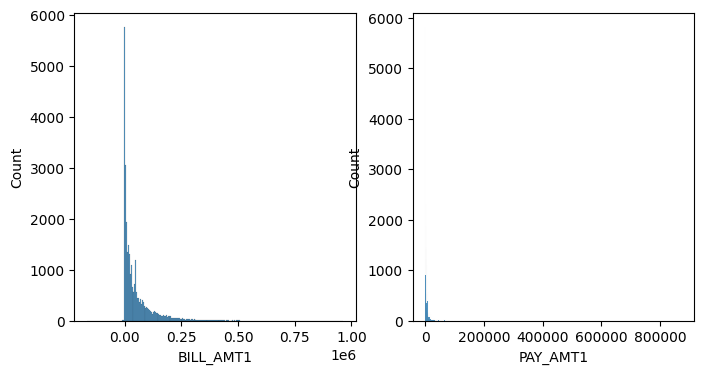

In [ ]:
f ,axs = plt.subplots(1,2, figsize = (8,4))
sns.histplot(data = data, x = "BILL_AMT1", ax = axs[0])
sns.histplot(data = data, x = "PAY_AMT1", ax = axs[1])
plt.show()

In [ ]:
for i, col in enumerate(data):
  if i in [2,3,4,6,7,8,9,10,11]:
    data[col] = data[col].astype('category')

In [ ]:
for i, col in enumerate(data):
  if i in [2,3,4,6,7,8,9,10,11]:
    data[col] = data[col].astype('category')

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data_noty = data.copy()
data_noty.drop(columns = ['default.payment.next.month'], inplace = True)

#### Visualizations for understanding independent and dependent variables

In [ ]:
#VIF for not transformed data
vif = [variance_inflation_factor(data_noty.values, i) for i in range(data_noty.shape[1])]
vif = zip(data_noty, vif)
vif_data = list(vif)
vif_df = pd.DataFrame(data = vif_data)
print(vif_df)

            0          1
0          ID   3.900888
1   LIMIT_BAL   4.044931
2         SEX   9.249064
3   EDUCATION   6.880630
4    MARRIAGE   6.443305
5         AGE  11.243607
6       PAY_1   1.919196
7       PAY_2   3.212811
8       PAY_3   3.728491
9       PAY_4   4.445586
10      PAY_5   4.989838
11      PAY_6   3.464096
12  BILL_AMT1  20.823072
13  BILL_AMT2  38.226748
14  BILL_AMT3  31.783344
15  BILL_AMT4  29.699253
16  BILL_AMT5  36.078837
17  BILL_AMT6  21.427063
18   PAY_AMT1   1.907528
19   PAY_AMT2   2.385541
20   PAY_AMT3   1.911829
21   PAY_AMT4   1.807452
22   PAY_AMT5   1.854712
23   PAY_AMT6   1.270776


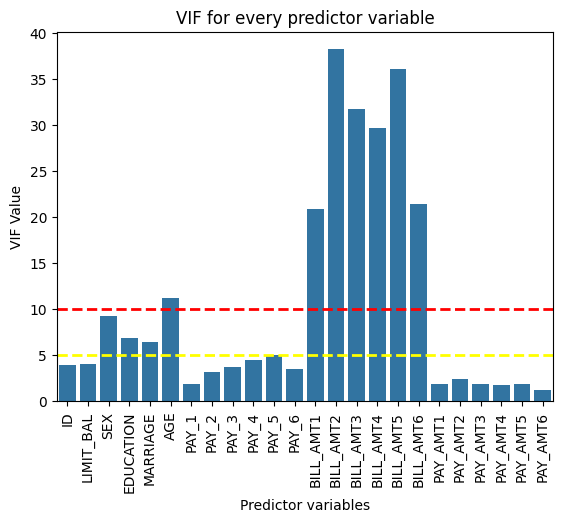

In [ ]:
sns.barplot(x = vif_df[0], y = vif_df[1])
plt.xticks(rotation=90)
plt.axhline(y=5, color='yellow', linestyle='--', linewidth=2, label='Horizontal Line')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label='Horizontal Line')
plt.title("VIF for every predictor variable")
plt.xlabel("Predictor variables")
plt.ylabel("VIF Value")
plt.show()

Columns having > 5 have moderate multicolinearity, but the columns like BILL_AMT1 to BILL_AMT6 have a high degre of variance due to multicolinearity.

In [ ]:
sns.pairplot(data_noty, height = 2, aspect = 1)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

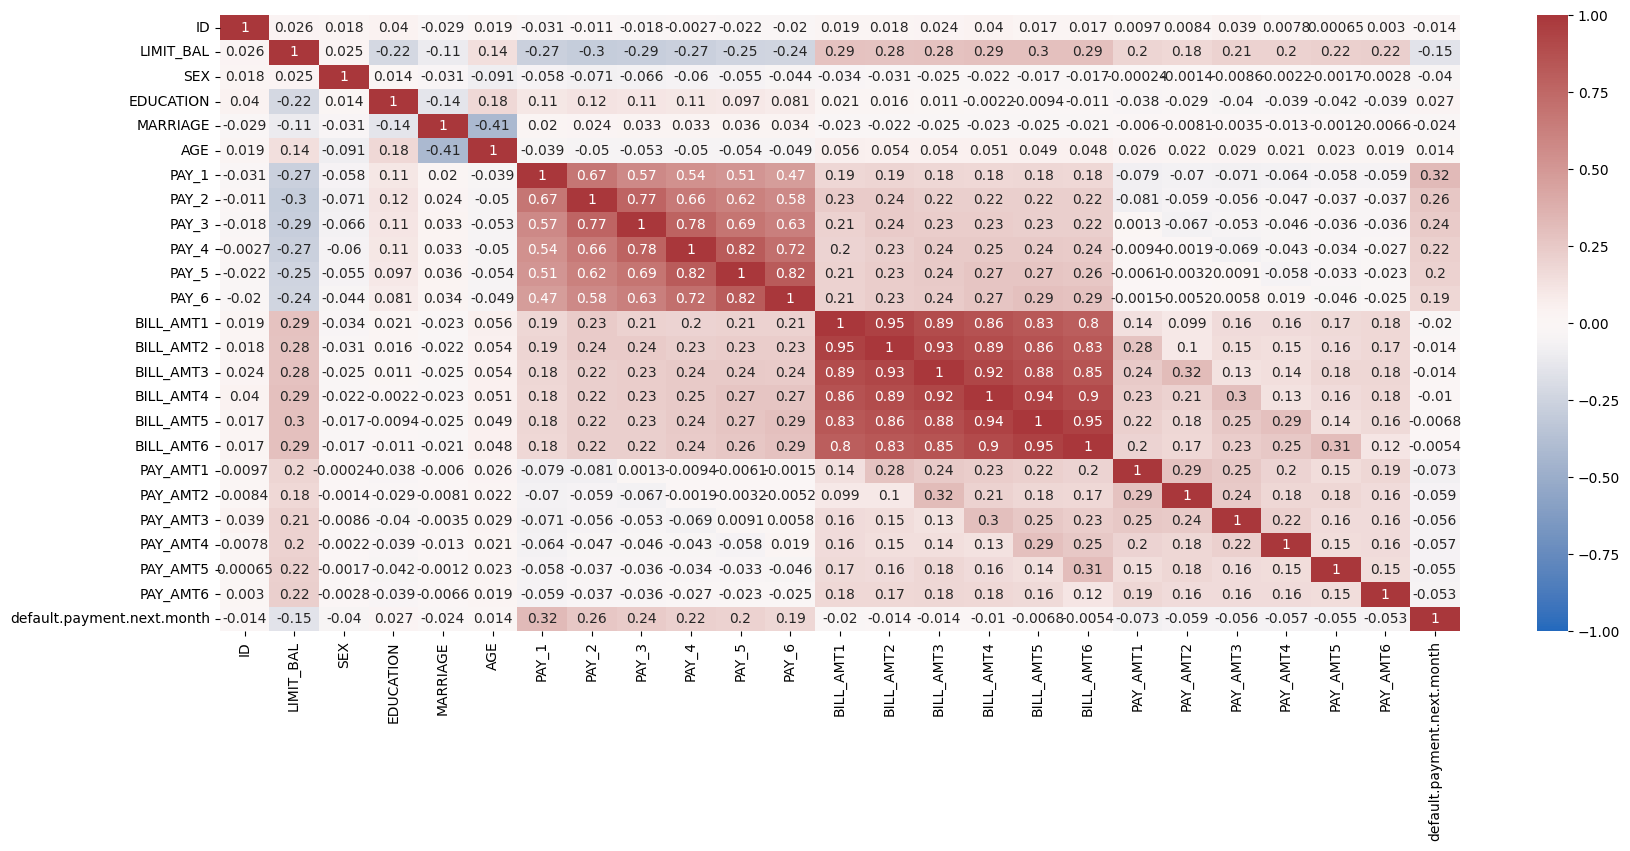

In [ ]:
plt.figure(figsize = (20, 8))
sns.heatmap(data.corr(), vmin= -1, vmax = +1, annot = True, cmap = sns.color_palette("vlag", as_cmap = True))
plt.show()

In [ ]:
data['default.payment.next.month'].value_counts()

,count
default.payment.next.month,
0,23364
1,6636


In [ ]:
print("The percentage of non-defaulters:", round(((data['default.payment.next.month'].value_counts()[0]/ data.shape[0]) * 100), 1))
print("The percentage of defaulters:", round(((data['default.payment.next.month'].value_counts()[1]/ data.shape[0]) * 100), 1))

The percentage of non-defaulters: 77.9
The percentage of defaulters: 22.1


#### Key Insights
* Columns like BILL_AMT1 to BILL_AMT6 have the highest variance due to multicolinearity with other variables.(vif > 10)

* Target variable is most influenced by the PAY_1 to PAY_6 independent variables. I have comverted PAY_1  to PAY_6 TO PAYc_1 to PAYc_6 with 3 bins paid duly, moderate defaulter, high defaulters to address categorical values and it decreased multicolinearity when compared to PAY_1 to PAY_6. It increased the influenced power of these variables to the target variable slightly which is to our benefit.

* Columns like LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE are weekly influencing the target variable but have lesser multicolinearity with other variables as compared to BILL_AMT1 TO BILL_AMT6.


* The BILL_AMT1 to BILL_AMT6 columns are highly correlated amongst themselves. Similarly, the PAY_AMT1 to PAY_AMT6 columns are also correlated with each other, although perhaps to a lesser extent than the bill amounts.

* The BILL_AMT1 TO BILL_AMT6 AND PAY_AMT0 TO PAY_AMT6 are the weekest influencers of the target variable.

* Class imbalance is also there in the target variable.(77.9(non-defaulters) - 22.1(defaulters))

### For feature Selection
* The LIMIT_BAL variable is highly corelated with every other variable.

* The most strong corelation of the default varible is with PAY_1 to PAY_6.

* Amoung the BILL_AMT1 to BILL_AMT 6 AND PAY_AMT1 TO PAY_AMT6, BILL_AMT1 and PAY_AMT1 have the strongest corelation with default dependent variable.

* BILL_AMT1 and PAY_AMT1 ARE highly correlated with each other which can cause convergence problems so the next best option is PAY_AMT2.


Features to be excluded from model building phase: LIMIT_BAL, BILL_AMT1 to BILL_AMT6, PAY_AMT1, PAY_AMT2 to PAY_AMT6

###Importing Train and Test data and Preparing it for Model Building Phase

In [39]:
data_train = pd.read_csv('/content/Train.csv')
data_test = pd.read_csv('/content/Test.csv')

In [40]:
data_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,2,120000,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,5,50000,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,6,50000,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
4,7,500000,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [41]:
data_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,5170,140000,2,2,2,26,0,0,2,0,...,125046,46364.0,83460,125000,6.0,4578.0,1427.0,87179.0,26291.0,1
1,22727,90000,2,1,2,31,1,-2,-2,-2,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
2,4884,150000,2,1,2,32,2,2,2,0,...,123954,131543.0,134319,6000,3000.0,4600.0,9800.0,5100.0,5000.0,1
3,7142,30000,2,2,2,21,-2,-2,-2,-2,...,4311,1551.0,0,780,3260.0,4311.0,1551.0,0.0,0.0,0
4,19043,70000,2,2,2,23,2,2,2,0,...,18013,19315.0,19859,2850,0.0,1400.0,1600.0,1000.0,0.0,1


In [42]:
data_train.rename(columns = {"PAY_0": "PAY_1",}, inplace = True)
data_test.rename(columns = {"PAY_0": "PAY_1",}, inplace = True)

In [43]:
edu_clean(data_train)
edu_clean(data_test)

In [44]:
data_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,2,120000,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,5,50000,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,6,50000,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
4,7,500000,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [45]:
for i, col in enumerate(data_train):
  if i in [2,3,4,6,7,8,9,10,11]:
    data_train[col] = data_train[col].astype('category')

In [46]:
for i, col in enumerate(data_test):
  if i in [2,3,4,6,7,8,9,10,11]:
    data_test[col] = data_test[col].astype('category')

In [47]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         26000 non-null  int64   
 1   LIMIT_BAL  26000 non-null  int64   
 2   SEX        26000 non-null  category
 3   EDUCATION  26000 non-null  category
 4   MARRIAGE   26000 non-null  category
 5   AGE        26000 non-null  int64   
 6   PAY_1      26000 non-null  category
 7   PAY_2      26000 non-null  category
 8   PAY_3      26000 non-null  category
 9   PAY_4      26000 non-null  category
 10  PAY_5      26000 non-null  category
 11  PAY_6      26000 non-null  category
 12  BILL_AMT1  26000 non-null  int64   
 13  BILL_AMT2  26000 non-null  float64 
 14  BILL_AMT3  26000 non-null  float64 
 15  BILL_AMT4  26000 non-null  float64 
 16  BILL_AMT5  26000 non-null  float64 
 17  BILL_AMT6  26000 non-null  float64 
 18  PAY_AMT1   26000 non-null  float64 
 19  PAY_AMT2   26000 non-null

In [48]:
data_train1 = data_train.copy()
data_test1 = data_test.copy()

In [49]:
X_train = data_train1.drop(columns = ['ID', 'Default', 'LIMIT_BAL', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                    'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)
y_train = data_train1['Default']

In [50]:
X_test = data_test1.drop(columns = ['ID', 'Default', 'LIMIT_BAL', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                    'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)
y_test = data_test1['Default']

In [51]:
# as -2, -1, 0 means paid duly only, we transform -1, -2 to 0 only, reducing the redundant categories
X_train.loc[(X_train['PAY_1'] == -1) | (X_train['PAY_1'] == -2), "PAY_1"] = 0
X_train.loc[(X_train['PAY_2'] == -1) | (X_train['PAY_2'] == -2), "PAY_2"] = 0
X_train.loc[(X_train['PAY_3'] == -1) | (X_train['PAY_3'] == -2), "PAY_3"] = 0
X_train.loc[(X_train['PAY_4'] == -1) | (X_train['PAY_4'] == -2), "PAY_4"] = 0
X_train.loc[(X_train['PAY_5'] == -1) | (X_train['PAY_5'] == -2), "PAY_5"] = 0
X_train.loc[(X_train['PAY_6'] == -1) | (X_train['PAY_6'] == -2), "PAY_6"] = 0

In [52]:
# as -2, -1, 0 means paid duly only, we transform -1, -2 to 0 only, reducing the redundant categories
X_test.loc[(X_test['PAY_1'] == -1) | (X_test['PAY_1'] == -2), "PAY_1"] = 0
X_test.loc[(X_test['PAY_2'] == -1) | (X_test['PAY_2'] == -2), "PAY_2"] = 0
X_test.loc[(X_test['PAY_3'] == -1) | (X_test['PAY_3'] == -2), "PAY_3"] = 0
X_test.loc[(X_test['PAY_4'] == -1) | (X_test['PAY_4'] == -2), "PAY_4"] = 0
X_test.loc[(X_test['PAY_5'] == -1) | (X_test['PAY_5'] == -2), "PAY_5"] = 0
X_test.loc[(X_test['PAY_6'] == -1) | (X_test['PAY_6'] == -2), "PAY_6"] = 0

In [53]:
X_test.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT2
0,2,2,2,26,0,0,2,0,0,0,28282.0,6.0
1,2,1,2,31,1,0,0,0,0,0,0.0,0.0
2,2,1,2,32,2,2,2,0,0,2,120800.0,3000.0
3,2,2,2,21,0,0,0,0,0,0,0.0,3260.0
4,2,2,2,23,2,2,2,0,0,2,14871.0,0.0


In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SEX        4000 non-null   category
 1   EDUCATION  4000 non-null   category
 2   MARRIAGE   4000 non-null   category
 3   AGE        4000 non-null   int64   
 4   PAY_1      4000 non-null   category
 5   PAY_2      4000 non-null   category
 6   PAY_3      4000 non-null   category
 7   PAY_4      4000 non-null   category
 8   PAY_5      4000 non-null   category
 9   PAY_6      4000 non-null   category
 10  BILL_AMT1  4000 non-null   float64 
 11  PAY_AMT2   4000 non-null   float64 
dtypes: category(9), float64(2), int64(1)
memory usage: 131.8 KB


## Model Building

### 1) Logistic Regression

In [55]:
clf = LogisticRegression(class_weight="balanced", max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [56]:
y_pred = clf.predict(X_test)
print("accuracy_score:", accuracy_score(y_test, y_pred))

accuracy_score: 0.7795


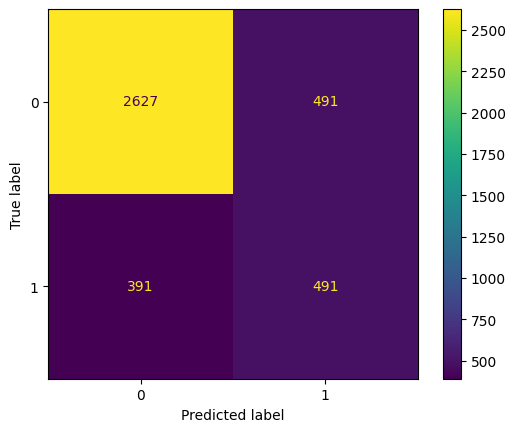

In [57]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(values_format= "")

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      3118
           1       0.50      0.56      0.53       882

    accuracy                           0.78      4000
   macro avg       0.69      0.70      0.69      4000
weighted avg       0.79      0.78      0.78      4000



In [59]:
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
results.head()

,Model,Accuracy,Precision,Recall,F1


In [64]:
def add_results(model):
  results.loc[len(results)] = [model, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

In [65]:
add_results('Logistic Regression')

In [66]:
results.head()

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.7795,0.5,0.556689,0.526824


### Key insights: Understanding Confusion Matrix in context to our credit card analysis
* **TP**(True Positive): The model predicted the person is a defaulter (1), and the person actually is a defaulter (1)

* **FP**(False Positive): The model predicted the person is a defaulter (1), but the person actually is not a defaulter (0)

* **TN**(True Negative): The model predicted the person is not a defaulter (0), and the person actually is not a defaulter (0)

* **FN**(False Negative): The model predicted the person is not a defaulter (0), but the person actually is a defaulter (1).



### Key Insights: Logistic Regression
* TN = 2627, as the non defaulters have the majority class, it is very good at prediciting them.
* FP = 491
* FN = 391
* TP = 491, our major concern is the true positive meaning the defaulters categorized as defaulters by the model.

The model accuracy is 77%, but in the case of binary classification for defaulters and non defaulters, we are more concerned about the FP rate and FN rate to be low, so high precision is important, which is 0.5 in our case.

It means that out of every 10 people your model predicts as a defaulter, 5 of them are actually non-defaulters who were misclassified (False Positives). This implies a high rate of denying credit to perfectly good customers, which aligns with your stated concern.

### 2) Random Forest

In [67]:
rf = RandomForestClassifier(n_estimators=1500, max_depth=3, max_features=3 ,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=3, n_estimators=1500,
                       random_state=42)

In [68]:
y_pred = rf.predict(X_test)
print("accuracy_score:", accuracy_score(y_test, y_pred))

accuracy_score: 0.80725


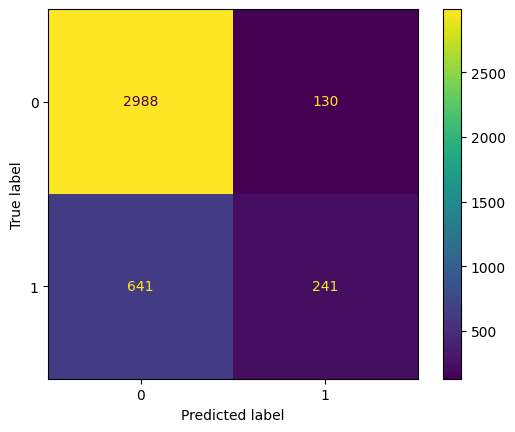

In [69]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(values_format= "")

In [70]:
add_results('Random Forest')

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      3118
           1       0.65      0.27      0.38       882

    accuracy                           0.81      4000
   macro avg       0.74      0.62      0.64      4000
weighted avg       0.79      0.81      0.78      4000



In [72]:
results.head()

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.77950,0.500000,0.556689,0.526824
1,Random Forest,0.80725,0.649596,0.273243,0.384677


###Key Insights: Random Forest
* TN: 2988
* FN: 641
* FP: 130
* TP: 241

The FP rate is lower and the precision of the model has also increased.
The class imbalance still has a clear effect on our prediction as the TN rate is the highest.

Performs better in terms of accuracy and precision, but the low F1 score is an issue as it is the harmonic mean of precision and recall.(accuracy and completeness of positive prediciton)

### 3) SVM

In [73]:
svm = SVC(gamma = 0.025, C = 3)
svm.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [74]:
y_pred = svm.predict(X_test)
print("accuracy_score:", accuracy_score(y_test, y_pred))

accuracy_score: 0.77675


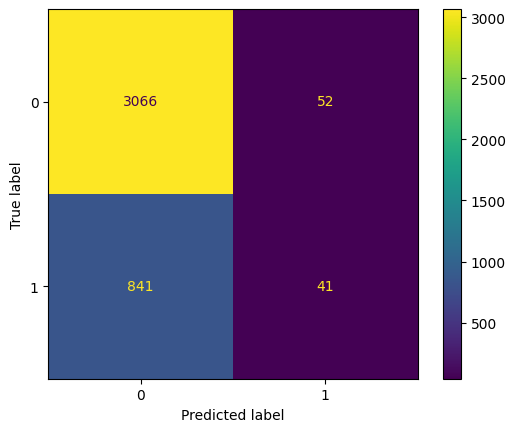

In [75]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(values_format= "")

In [76]:
add_results('SVM')

In [77]:
results.head()

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.77950,0.500000,0.556689,0.526824
1,Random Forest,0.80725,0.649596,0.273243,0.384677
2,SVM,0.77675,0.440860,0.046485,0.084103


### Key Insights: SVM Model
* TN: 3066
* FN: 841
* FP: 52
* TP: 41

This model results in F1 score of 8% which is really bad. Meaning the precision and recall(accuracy and completeness of positive prediction both are really bad)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SEX        26000 non-null  category
 1   EDUCATION  26000 non-null  category
 2   MARRIAGE   26000 non-null  category
 3   AGE        26000 non-null  int64   
 4   PAY_1      26000 non-null  category
 5   PAY_2      26000 non-null  category
 6   PAY_3      26000 non-null  category
 7   PAY_4      26000 non-null  category
 8   PAY_5      26000 non-null  category
 9   PAY_6      26000 non-null  category
 10  BILL_AMT1  26000 non-null  int64   
 11  PAY_AMT2   26000 non-null  float64 
dtypes: category(9), float64(1), int64(2)
memory usage: 840.8 KB


In [79]:
#Converting category variables to int as Sequential model does not work on category dtypes
for i in X_train:
  if i in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    X_train[i] = X_train[i].astype('int')

In [80]:
#Converting category variables to int as Sequential model does not work on category dtypes
for i in X_test:
  if i in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    X_test[i] = X_test[i].astype('int')

In [81]:
X_train.shape

(26000, 12)

In [82]:
def ann_model():
  model = Sequential()

  model.add(Dense(16, input_shape = (12, ), kernel_initializer='normal', activation = "relu" ))
  model.add(Dense(8, kernel_initializer='normal',  activation = "relu"))
  model.add(Dense(8, kernel_initializer='normal',  activation = "relu"))
  model.add(Dense(1, activation = "sigmoid"))

  model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

  return model

In [83]:
#from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced',
#                                                 classes=np.unique(y_train), # Assumes y_train contains 0 and 1
#                                                 y=y_train)
#class_weight_dict = dict(enumerate(class_weights))
estimator1 = ann_model()
estimator1.fit(X_train, y_train, epochs = 100, batch_size = 15)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7294 - loss: 2.0287
Epoch 2/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7771 - loss: 0.5306
Epoch 3/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7768 - loss: 0.5299
Epoch 4/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7821 - loss: 0.5228
Epoch 5/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7779 - loss: 0.5292
Epoch 6/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7764 - loss: 0.5308
Epoch 7/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7791 - loss: 0.5270
Epoch 8/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7764 - loss: 0.5307
Epoch 9/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7799 - loss: 0.5255
Epoch 10/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7784 - loss: 0.5280
Epoch 11/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7808 - loss: 0.5246
Epoch 12/100
1734/1

In [84]:
y_pred = estimator1.predict(X_test)
y_pred = np.round(y_pred)
print("accuracy score:", accuracy_score(y_test, y_pred))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
accuracy score: 0.7775


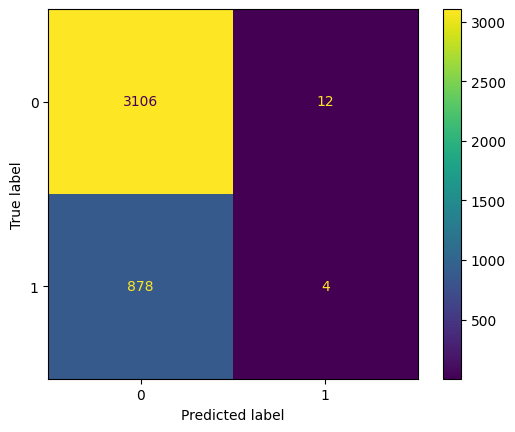

In [85]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(values_format= "")

In [86]:
add_results('ANN')

In [87]:
results.head()

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.77950,0.500000,0.556689,0.526824
1,Random Forest,0.80725,0.649596,0.273243,0.384677
2,SVM,0.77675,0.440860,0.046485,0.084103
3,ANN,0.77750,0.250000,0.004535,0.008909


### Key Insights: ANN Model
* TN: 3106
* FN: 878
* FP: 12
* TP: 4

This model results in a strong precision score. However the F1 score is lesser meaning FN rate would have been high, that resulted in lower recall, hence the lower F1 score.

In [88]:
results.head()

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.77950,0.500000,0.556689,0.526824
1,Random Forest,0.80725,0.649596,0.273243,0.384677
2,SVM,0.77675,0.440860,0.046485,0.084103
3,ANN,0.77750,0.250000,0.004535,0.008909


# Conclusion
* For selecting the best model in case of binary classification when the dataset is imbalanced, accuracy is not eneough.

* when we consider high FP rate meaning non defaulter classified as defaulters, it might result in higher customer dissatisfaction and losing business as customers would shift to the competitors.

* when we consider high FN rate meaning defaulter classified as non defaulter means lower profit for the organization.

* Based on the above conditions a model with High F1 score(harmonic mean of precision(High presicion means low FP rate) and recall(high recall means low FN rate)) and not only high accuracy would be our champion model. On comparing, logistic regression model is performing well in terms of F1-score over any other model.

* Best model for our use case is the Logistic Regression Model with accuracy of 77.9%, precision of 50%, F1 score of 52.6%

* As the F1 score is 52.6% suggests significant room for improvement in lowering FP and FN rate with resampling the class imbalance, feature engineering and scaling.